In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

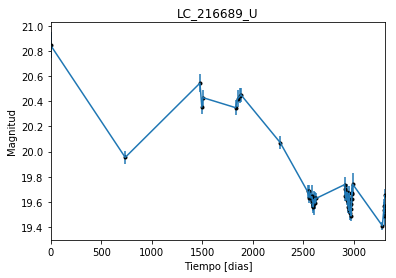

In [2]:
data = np.genfromtxt('LC_216689_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_216689_U')
plt.savefig("LC_216689_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

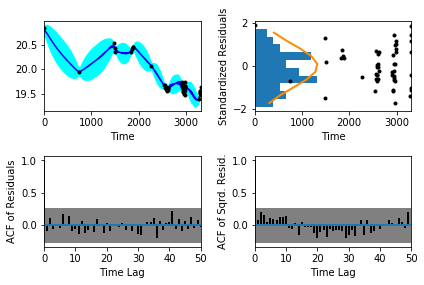

In [5]:
sample.assess_fit()

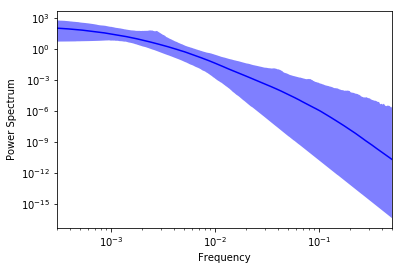

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

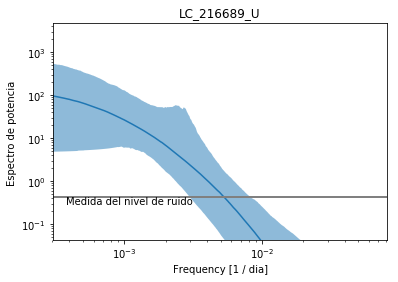

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_216689_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_216689_U')

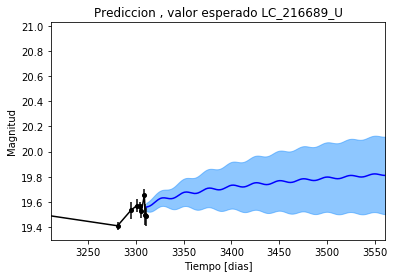

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_216689_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_216689_U')

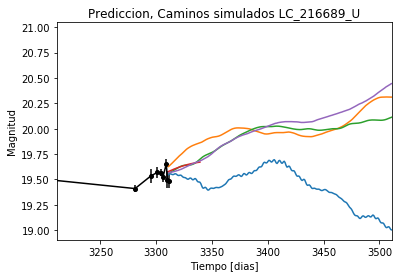

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_216689_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


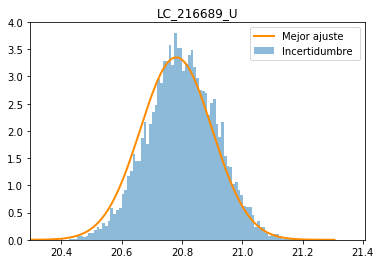

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_216689_U')
plt.savefig("Mejor_ajuste_LC_216689_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_216689_U')

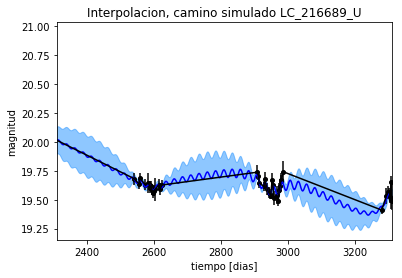

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_216689_U')

Text(0.5,1,'Interpolacion, camino simulado  LC_216689_U')

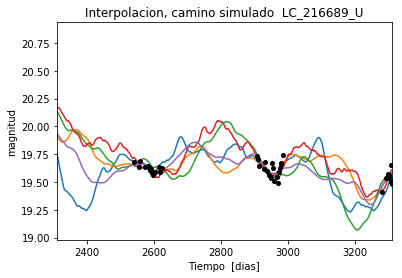

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_216689_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 474.295721138
Median: 0.00873949905399
Standard deviation: 0.195336066404
68% credibility interval: [ 0.00084907  0.20600537]
95% credibility interval: [  3.54582747e-04   7.77559259e-01]
99% credibility interval: [  3.15295009e-04   9.66266219e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 642.060749514
Median: 0.00183312039304
Standard deviation: 0.0639747979669
68% credibility interval: [ 0.00045351  0.0206841 ]
95% credibility interval: [ 0.00032214  0.19959274]
99% credibility interval: [  3.05349166e-04   4.45033350e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 270.058313532
Median: 0.0103765023476
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1640.78270917
Median: 74.1909829096
Standard deviation: 1.77933383891
68% credibility interval: [ 72.24702935  75.50101396]
95% credibility interval: [ 69.57607453  76.3833347 ]
99% credibility interval: [ 67.60310238  77.64971692]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 632.917990978
Median: 0.460896997347
Standard deviation: 1.99599803784
68% credibility interval: [ 0.03885027  3.62255703]
95% credibility interval: [ 0.0126067   6.66540922]
99% credibility interval: [  8.32456939e-03   8.67939363e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 390.948077791
Median: 0.507966009092
Standard deviation: 7.66241610784
68% credibility interval: [ 0.02234759  8.20202882]
95% credibility interval: [  1.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 599.862868228
Median: 3.97998699307e-29
Standard deviation: 98088592396.3
68% credibility interval: [  8.90391408e-64   2.10243577e-07]
95% credibility interval: [  1.32128480e-102   1.15187099e+000]
99% credibility interval: [  3.98695798e-108   1.20541711e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1872.09430223
Median: 20.1079301692
Standard deviation: 0.245252918139
68% credibility interval: [ 19.91024227  20.3442637 ]
95% credibility interval: [ 19.68252695  20.64109113]
99% credibility interval: [ 19.45122837  20.92794982]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 190.60890563
Median: 0.00807800357016
Standard deviation: 0.239405987159
68% credibility interval: [ 0.          0.37047603]
95% credibility interval: [ 0.         0.8474513]
99% credibility interval: [ 0.          0.97582788]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 190.60890563
Median: 0.00807800357016
Standard deviation: 0.239405987159
68% credibility interval: [ 0.          0.37047603]
95% credibility interval: [ 0.         0.8474513]
99% credibility interval: [ 0.          0.97582788]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 262.092063189
Median: 0.0
Standard deviation: 0.000629201915409
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1640.78270917
Median: 74.1909829096
Standard deviation: 1.77933383891
68% credibility interval: [ 72.24702935  75.50101396]
95% credibility interval: [ 69.57607453  76.3833347 ]
99% credibility interval: [ 67.60310238  77.64971692]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1566.4785312
Median: 0.208180372953
Standard deviation: 0.2840568071
68% credibility interval: [ 0.12289417  0.40270344]
95% credibility interval: [ 0.08070431  0.92540187]
99% credibility interval: [ 0.06513321  1.79811212]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1456.17653261
Median: 0.953380644787
Standard deviation: 0.163207248408
68% credibility interval: [ 0.81292564  1.13133502]
95% credibility interval: [ 0.69930404  1.32880518]
99% credibility interval: [ 0.64334674  1.46888315]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 389.836882817
Median: 0.000432420453922
Standard deviation: 0.0599897511993
68% credibility interval: [  1.33294429e-05   9.51803895e-03]
95% credibility interval: [  4.45286891e-07   8.01559372e-02]
99% credibility interval: [  8.31040512e-08   4.51830464e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 474.295721138
Median: (-0.0549118920481-0.101109834516j)
Standard deviation: 1.94140671077
68% credibility interval: [-1.29436990+0.j         -0.00533486-0.01607588j]
95% credibility interval: [ -4.88554891e+00+0.j          -2.22790911e-03-0.00119547j]
99% credibility interval: [ -6.07122971e+00+0.j          -1.98105697e-03-0.01762054j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 642.060749514
Median: (-0.0115178351199+0.026851103042j)
Standard deviation: 1.55701339943
68% credibility interval: [-0.12996203+1.86975425j -0.00284951+0.03451576j]
95% credibility interval: [-1.25407818+4.39896963j -0.00202406+0.j        ]
99% credibility interval: [ -2.79622700e+00+3.11976406j  -1.91856539e-03+0.j        ]
Posterior su